<a href="https://colab.research.google.com/github/Martinmbiro/PyTorch-workflow/blob/main/01%20Data%20preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**
> 📝 **Note**  
> For this section, we'll train a model to learn the pattern of a straight line and predict it
+ Recall that in Machine Learning, data could represent anything (audio, photos, videos, numbers, e.t.c). However, we'll start simple with a [`Regression`](https://en.wikipedia.org/wiki/Linear_regression) task, where the _target_ is numerical

In [ ]:
# import torch
import torch, matplotlib.pyplot as plt
# specify style sheet to use
plt.style.use('fast')

torch.__version__

'2.5.1+cu121'

### Creating data using the linear regression formula
> Recall the linear regression formula  
+ We'll use known parameters for `m` and `c` as `weight` and `bias` respectively, to map the input, `X` to the output `y`

```
    y = mX + c

```

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

> ✋ **Info**  
+ We'll use [`torch.arange()`](https://pytorch.org/docs/stable/generated/torch.arange.html#torch-arange) to generate values between `0` and `1` with a step of `0.02` between values
+ [`Tensor.unsqueeze()`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html#torch.unsqueeze) will add a dimension of size `1` at position `1` so that we have n _rows_, but `1` _column_ for the entire data

In [ ]:
# create data, input and target
# input
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)

# output
y = weight * X + bias

In [ ]:
# check shape of data
print(f'Input shape: {y.shape}')
print(f'Output shape: {X.shape}')

Input shape: torch.Size([50, 1])
Output shape: torch.Size([50, 1])


In [ ]:
# visualize data (first 5 values for X and y)
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# alternatively:
print(X[:, 0][:5])
print(y[:, 0][:5])

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800])
tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560])


### Splitting data into train and validation sets
> ✋ **Info**

> It is common practice to use 80% of a dataset for training and 20% for validation.
+ We'll do that using a slicing index
+ Alternatively, we could split by _filtering_ the tensor based on [`torch.Tensor.quantile()`](https://pytorch.org/docs/stable/generated/torch.Tensor.quantile.html#torch-tensor-quantile)

In [ ]:
# define a slicing index:
train_split = round(0.8*len(X))

# split into training and validation sets
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# size
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# define a function to plot train, test and predicted values
def plot_predictions(X_test=X_test, X_train=X_train,
                     y_train=y_train, y_test=y_test, preds=None):
  _, ax = plt.subplots(figsize=(5, 3.5), layout='constrained')
  # train data
  ax.scatter(x=X_train, y=y_train, s=4.5, c='#007fff',
            label='Train Data')
  # test data
  ax.scatter(x=X_test, y=y_test, s=3.0, c='#ab274f',
            label='Test Data')
  # preds
  if preds is not None:
    ax.scatter(x=X_test, y=preds, c='#000000',
              marker='*', label='y_preds')

  ax.tick_params(axis='both', labelsize=9)
  ax.set_ylabel('Target (y)')
  ax.set_xlabel('Input (X)')
  ax.set_title('Target values (y) vs Input values (X)',
              weight='black', fontsize=11)

  plt.legend(loc='upper right', fancybox=False,
            bbox_to_anchor=(1.41, 1.025))
  plt.show()

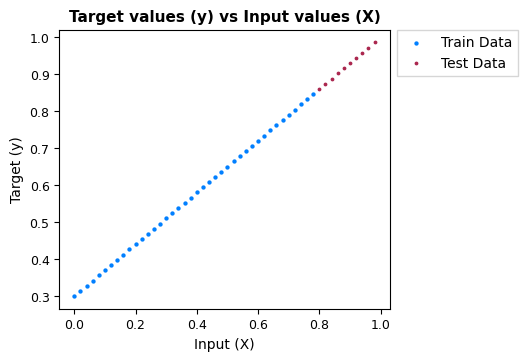

In [ ]:
# call plotting function
plot_predictions()

> ▶️ **Up Next**  

> Buiding a PyTorch model